## Downloading tickers


In [1]:
import bs4 as bs
import pickle
import requests


def save_tickers():
	resp=requests.get('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
	soup=bs.BeautifulSoup(resp.text)
	table=soup.find('table',{'class':'wikitable sortable'})
	tickers=[]
	for row in table.findAll('tr')[1:]:
		ticker=row.findAll('td')[0].text[:-1]
		tickers.append(ticker)

	with open("tickers.pickle",'wb') as f:
		pickle.dump(tickers, f)


	return tickers

save_tickers()


/usr/lib/python3/dist-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /usr/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


['MMM',
 'ABT',
 'ABBV',
 'ABMD',
 'ACN',
 'ATVI',
 'ADBE',
 'AMD',
 'AAP',
 'AES',
 'AFL',
 'A',
 'APD',
 'AKAM',
 'ALK',
 'ALB',
 'ARE',
 'ALXN',
 'ALGN',
 'ALLE',
 'LNT',
 'ALL',
 'GOOGL',
 'GOOG',
 'MO',
 'AMZN',
 'AMCR',
 'AEE',
 'AAL',
 'AEP',
 'AXP',
 'AIG',
 'AMT',
 'AWK',
 'AMP',
 'ABC',
 'AME',
 'AMGN',
 'APH',
 'ADI',
 'ANSS',
 'ANTM',
 'AON',
 'AOS',
 'APA',
 'AAPL',
 'AMAT',
 'APTV',
 'ADM',
 'ANET',
 'AJG',
 'AIZ',
 'T',
 'ATO',
 'ADSK',
 'ADP',
 'AZO',
 'AVB',
 'AVY',
 'BKR',
 'BLL',
 'BAC',
 'BK',
 'BAX',
 'BDX',
 'BRK-B',
 'BBY',
 'BIO',
 'BIIB',
 'BLK',
 'BA',
 'BKNG',
 'BWA',
 'BXP',
 'BSX',
 'BMY',
 'AVGO',
 'BR',
 'BF-B',
 'CHRW',
 'COG',
 'CDNS',
 'CPB',
 'COF',
 'CAH',
 'KMX',
 'CCL',
 'CARR',
 'CTLT',
 'CAT',
 'CBOE',
 'CBRE',
 'CDW',
 'CE',
 'CNC',
 'CNP',
 'CERN',
 'CF',
 'SCHW',
 'CHTR',
 'CVX',
 'CMG',
 'CB',
 'CHD',
 'CI',
 'CINF',
 'CTAS',
 'CSCO',
 'C',
 'CFG',
 'CTXS',
 'CLX',
 'CME',
 'CMS',
 'KO',
 'CTSH',
 'CL',
 'CMCSA',
 'CMA',
 'CAG',
 'CXO',
 'COP

### Getting Data

In [3]:

import bs4 as bs
import pickle
import requests
import datetime as dt
import os
import pandas as pd
import pandas_datareader.data as web



def fetch_data():
	with open("tickers.pickle",'rb') as f:
			tickers=pickle.load(f)

	if not os.path.exists('stock_details'):
		os.makedirs('stock_details')
	count=300

	start= dt.datetime(2017,5,11)
	end=dt.datetime(2021,1,4)
	count=0
	for ticker in tickers:
		if count==300:
			break
		count+=1
		print(ticker)
		
		try:
				df=web.DataReader(ticker, 'yahoo', start, end)
				df.to_csv('stock_details/{}.csv'.format(ticker))
		except:
				print("Error")
				continue

		
fetch_data()



MMM
ABT
ABBV
ABMD
ACN
ATVI
ADBE
AMD
AAP
AES
AFL
A
APD
AKAM
ALK
ALB
ARE
ALXN
ALGN
ALLE
LNT
ALL
GOOGL
GOOG
MO
AMZN
AMCR
AEE
AAL
AEP
AXP
AIG
AMT
AWK
AMP
ABC
AME
AMGN
APH
ADI
ANSS
ANTM
AON
AOS
APA
AAPL
AMAT
APTV
ADM
ANET
AJG
AIZ
T
ATO
ADSK
ADP
AZO
AVB
AVY
BKR
BLL
BAC
BK
BAX
BDX
BRK-B
BBY
BIO
BIIB
BLK
BA
BKNG
BWA
BXP
BSX
BMY
AVGO
BR
BF-B
CHRW
COG
CDNS
CPB
COF
CAH
KMX
CCL
CARR
CTLT
CAT
CBOE
CBRE
CDW
CE
CNC
CNP
CERN
CF
SCHW
CHTR
CVX
CMG
CB
CHD
CI
CINF
CTAS
CSCO
C
CFG
CTXS
CLX
CME
CMS
KO
CTSH
CL
CMCSA
CMA
CAG
CXO
COP
ED
STZ
COO
CPRT
GLW
CTVA
COST
CCI
CSX
CMI
CVS
DHI
DHR
DRI
DVA
DE
DAL
XRAY
DVN
DXCM
FANG
DLR
DFS
DISCA
DISCK
DISH
DG
DLTR
D
DPZ
DOV
DOW
DTE
DUK
DRE
DD
DXC
EMN
ETN
EBAY
ECL
EIX
EW
EA
EMR
ETR
EOG
EFX
EQIX
EQR
ESS
EL
ETSY
EVRG
ES
RE
EXC
EXPE
EXPD
EXR
XOM
FFIV
FB
FAST
FRT
FDX
FIS
FITB
FE
FRC
FISV
FLT
FLIR
FLS
FMC
F
FTNT
FTV
FBHS
FOXA
FOX
BEN
FCX
GPS
GRMN
IT
GD
GE
GIS
GM
GPC
GILD
GL
GPN
GS
GWW
HAL
HBI
HIG
HAS
HCA
PEAK
HSIC
HSY
HES
HPE
HLT
HFC
HOLX
HD
HON
HRL
HST
HWM
HPQ
HUM
HBAN
HII
IEX

In [23]:
import os
import pandas as pd
import pickle


def compile():
	with open("tickers.pickle",'rb') as f:
			tickers=pickle.load(f)


	main_df=pd.DataFrame()

	for count,ticker in enumerate(tickers):
		if not os.path.exists('stock_details/{}.csv'.format(ticker)):
			continue
		df=pd.read_csv('stock_details/{}.csv'.format(ticker))
		df.set_index('Date',inplace=True)

		df.rename(columns={'Adj Close': ticker}, inplace=True)
		df.drop(['Open','High','Low',"Close",'Volume'],axis=1,inplace=True)

		
		if main_df.empty:
			main_df=df
		else:
			main_df=main_df.join(df,how='outer')

	print(main_df.head())
	main_df.to_csv('Dataset_all.csv')

compile()

                   MMM        ABT       ABBV        ABMD         ACN  \
Date                                                                   
2017-05-10  175.699173  41.881226  55.240952  131.800003  114.601151   
2017-05-11  175.797485  41.278885  54.671627  130.850006  114.222931   
2017-05-12  175.636658  41.373005  55.307930  131.419998  114.374214   
2017-05-15  176.583740  41.448299  55.818645  134.509995  115.593979   
2017-05-16  176.833923  41.118893  55.969349  133.839996  116.435524   

                 ATVI        ADBE    AMD         AAP        AES  ...  \
Date                                                             ...   
2017-05-10  54.897884  136.149994  10.79  144.070404  10.058594  ...   
2017-05-11  54.662563  136.289993  11.07  143.863419   9.971656  ...   
2017-05-12  54.917488  136.839996  11.26  142.946701   9.849946  ...   
2017-05-15  55.309689  137.600006  11.42  143.764847   9.910800  ...   
2017-05-16  55.672474  138.029999  12.75  143.173416   9.841249

In [24]:
import pandas as pd

In [25]:
df_all=pd.read_csv('Dataset_all.csv')

In [26]:
df_all.head()

,Date,MMM,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AMD,AAP,...,LKQ,LMT,L,LOW,LUMN,LYB,MTB,MRO,MPC,MKTX
0,2017-05-10,175.699173,41.881226,55.240952,131.800003,114.601151,54.897884,136.149994,10.79,144.070404,...,31.290001,247.154053,45.510078,80.547012,NaN,57.198570,144.563919,14.033338,45.465927,183.680359
1,2017-05-11,175.797485,41.278885,54.671627,130.850006,114.222931,54.662563,136.289993,11.07,143.863419,...,31.030001,247.472382,44.981003,79.274139,NaN,56.858688,143.774384,13.823316,45.613598,183.846283
2,2017-05-12,175.636658,41.373005,55.307930,131.419998,114.374214,54.917488,136.839996,11.26,142.946701,...,31.020000,246.717529,44.834045,79.386459,NaN,56.213581,143.211716,13.680119,45.752579,181.952484
3,2017-05-15,176.583740,41.448299,55.818645,134.509995,115.593979,55.309689,137.600006,11.42,143.764847,...,31.170000,247.708847,45.137772,79.732773,NaN,57.247128,145.689209,13.929198,46.347340,183.904877
4,2017-05-16,176.833923,41.118893,55.969349,133.839996,116.435524,55.672474,138.029999,12.75,143.173416,...,30.980000,247.072220,45.441502,79.891861,NaN,57.614758,147.349945,13.823819,45.901272,180.322250


In [27]:
len(df_all.columns)

301

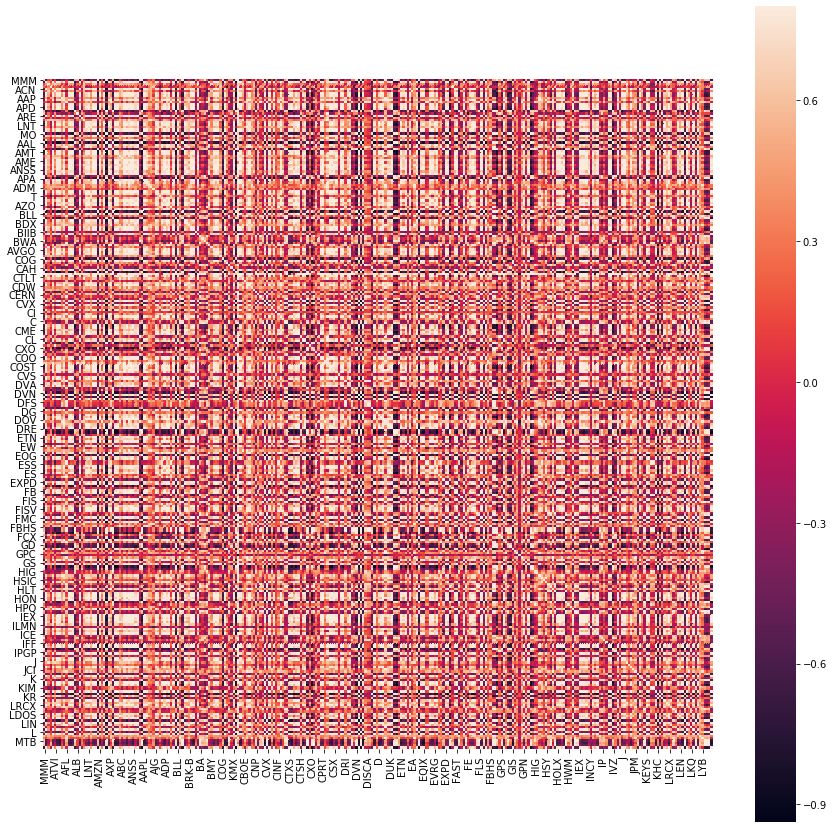

In [29]:
import seaborn as sb
import matplotlib.pyplot as plt
C_mat = df_all.corr()
fig = plt.figure(figsize = (15,15))

sb.heatmap(C_mat, vmax = .8, square = True)
plt.show()

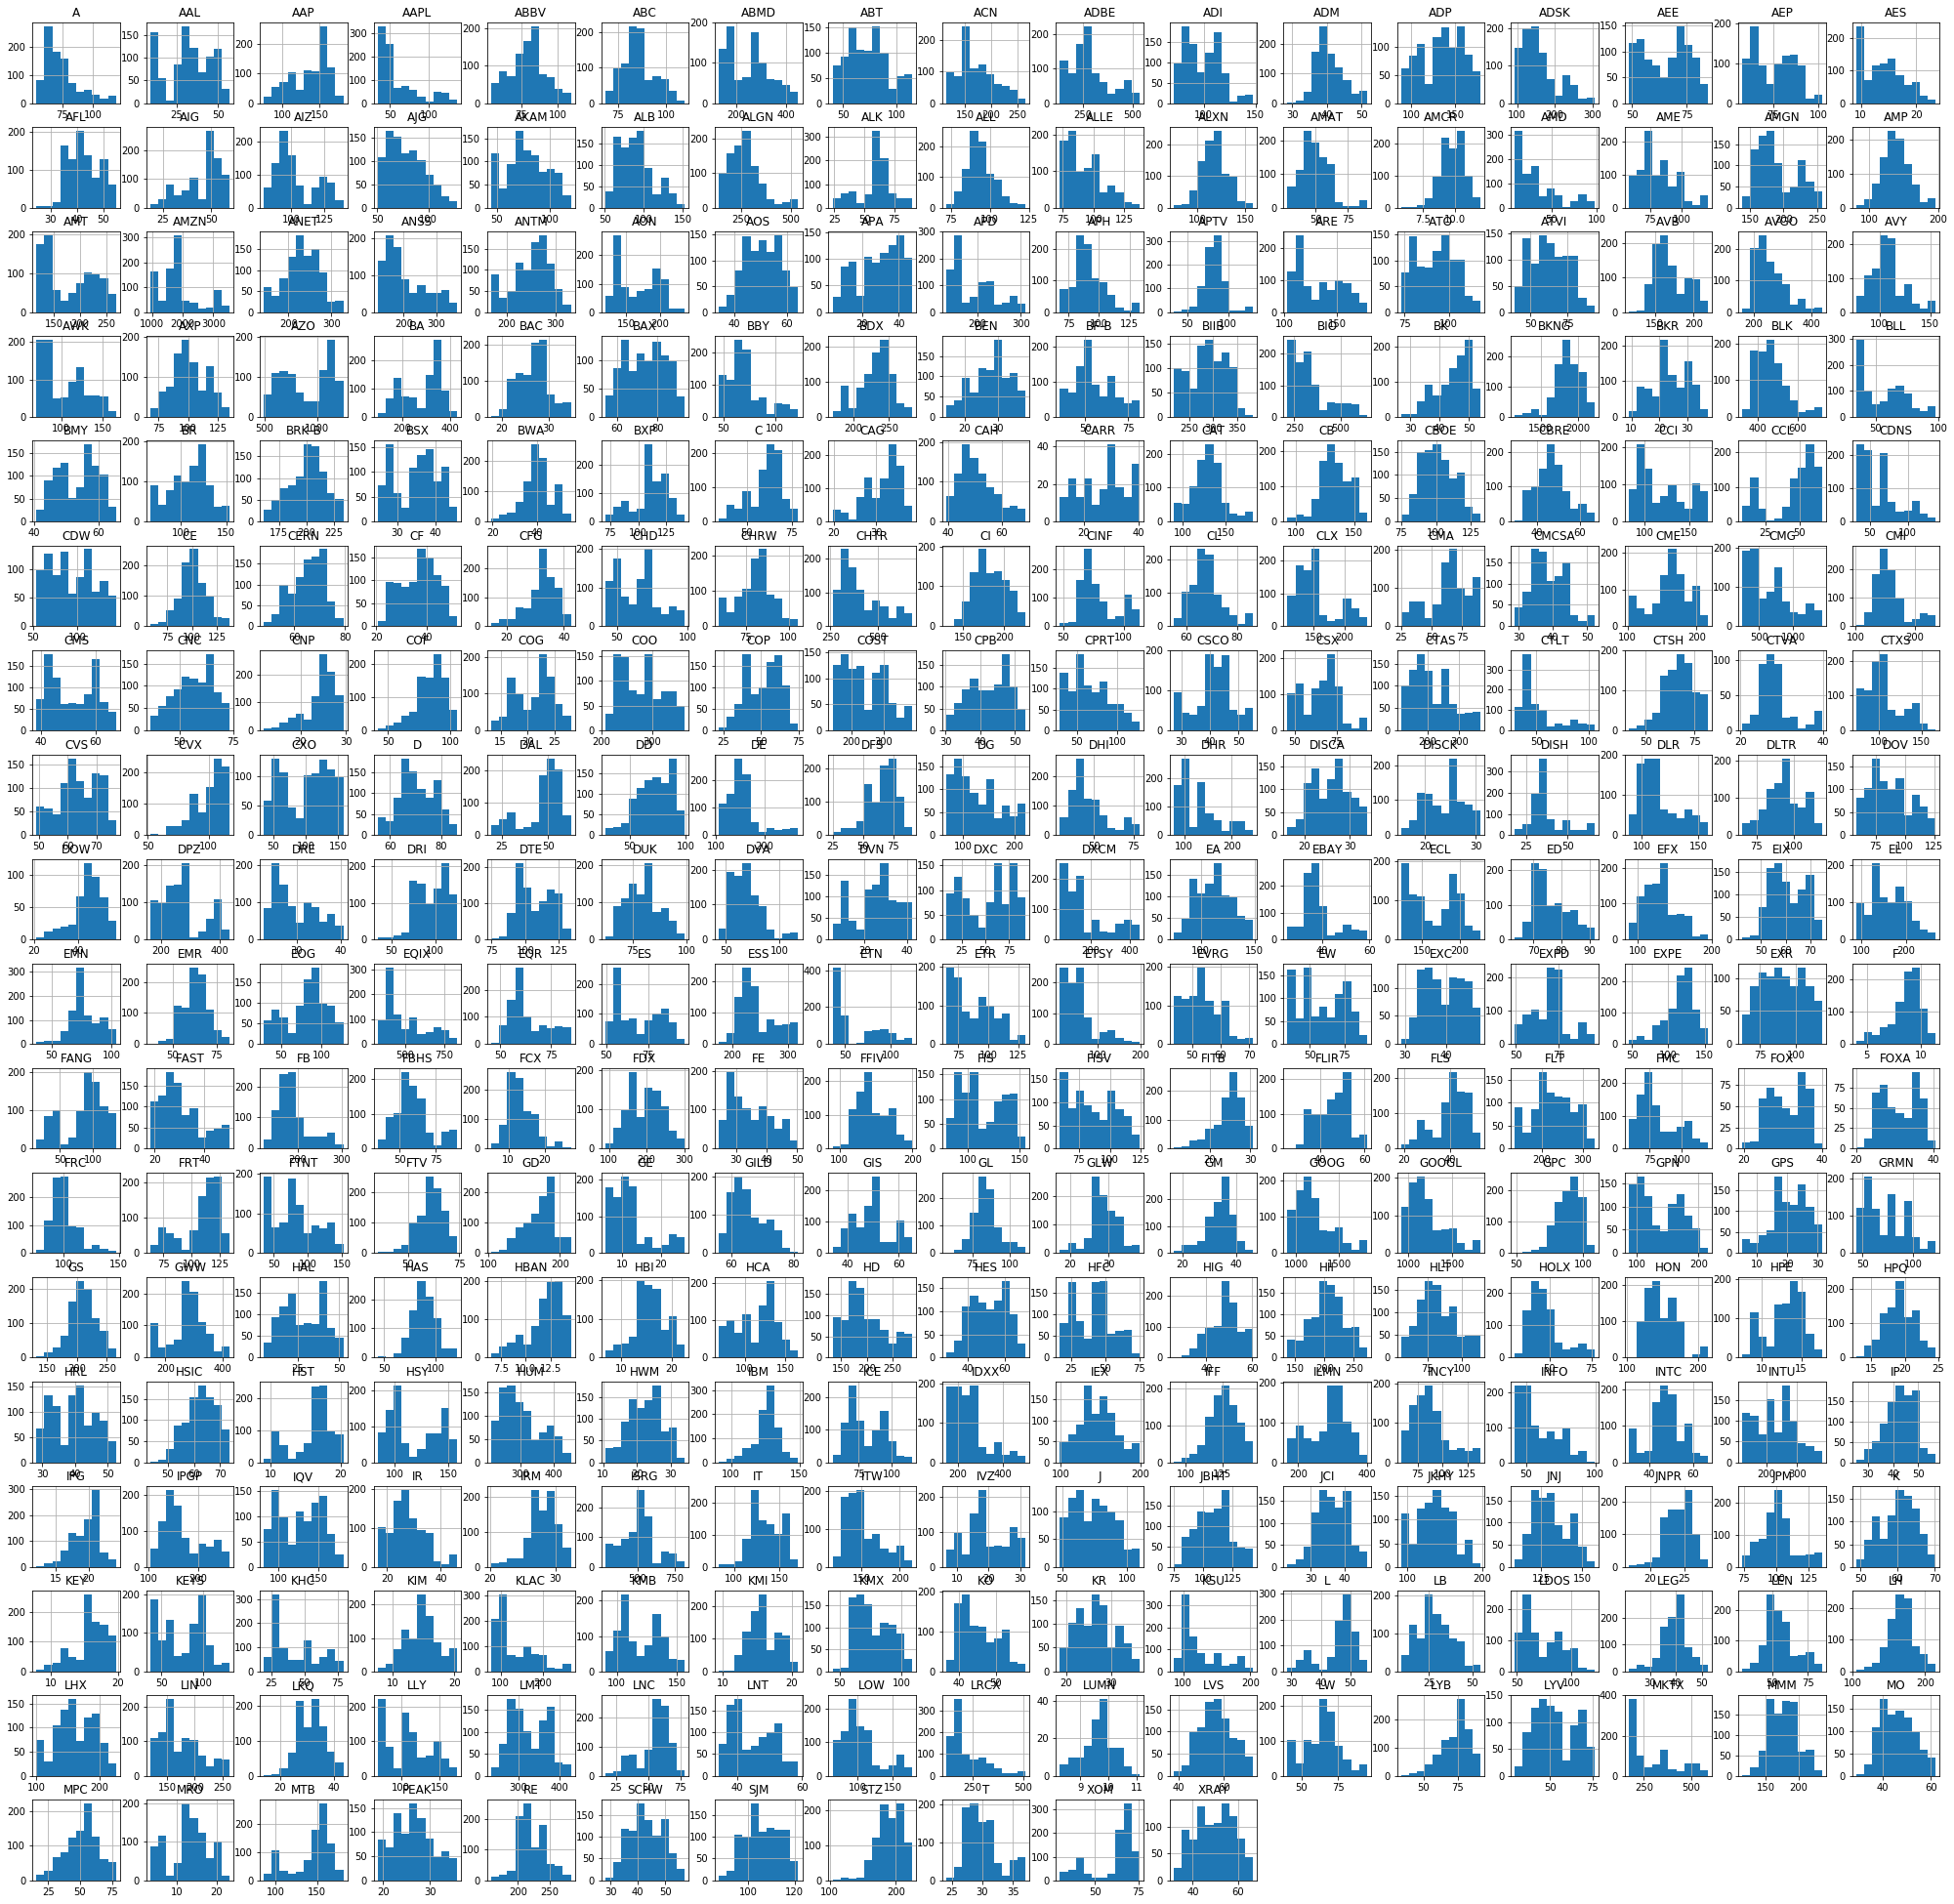

In [31]:
df_all.hist(figsize = (35,35))
plt.show()

### Pre-processing

In [32]:
cor = df_all.corr()

In [50]:
cor_target = abs(cor["AMZN"])

In [51]:
relevant_features = cor_target[(cor_target>0.85)]

In [55]:
relevant_features_2 = relevant_features[(cor_target<0.9)]

In [56]:
len(relevant_features_2)

31

In [65]:
relevant_features_2.sort_values(ascending=False, inplace=True)

In [67]:
relevant_features_3=relevant_features_2[:10]

In [68]:
relevant_features_3

APD     0.898644
CTAS    0.892556
HUM     0.892183
CPRT    0.888079
A       0.887473
AJG     0.885684
MKTX    0.881682
CHD     0.873921
INFO    0.872650
BF-B    0.872556
Name: AMZN, dtype: float64

In [69]:
relevant_tickers=relevant_features_3.keys()

In [71]:
relevant_tickers=list(relevant_tickers)

In [72]:
relevant_tickers

['APD', 'CTAS', 'HUM', 'CPRT', 'A', 'AJG', 'MKTX', 'CHD', 'INFO', 'BF-B']

In [74]:
df_relevant=df_all[relevant_tickers]

In [75]:
df_relevant.head()

,APD,CTAS,HUM,CPRT,A,AJG,MKTX,CHD,INFO,BF-B
0,132.025391,116.400665,224.781387,30.170000,54.481506,50.906693,183.680359,48.258198,43.055977,36.706463
1,130.761948,117.455017,224.713196,29.920000,54.442787,50.585552,183.846283,48.068459,43.055977,36.974762
2,130.952820,117.224976,225.940338,29.889999,54.375004,50.218517,181.952484,47.801838,42.818104,36.669197
3,131.870834,117.292068,225.083313,29.980000,54.897842,50.640598,183.904877,47.849445,43.343414,36.870426
4,131.207336,117.483765,220.301315,29.969999,55.023720,50.750713,180.322250,47.116230,43.472267,37.608280


In [4]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

In [77]:
len(df_relevant)

920

### Finding Relevant Tickers

In [85]:
tickers=list(df_relevant.columns)

In [86]:
tickers

['APD', 'CTAS', 'HUM', 'CPRT', 'A', 'AJG', 'MKTX', 'CHD', 'INFO', 'BF-B']

In [102]:
val_tickers=[]

In [103]:
for i in range(0,len(tickers)):
    temp=list(df_relevant.iloc[:][tickers[i]])
    val_tickers.append(temp)

In [109]:
total_X=[]
total_Y=[]

In [111]:
for i in range(0,len(val_tickers)):
    X=[]
    Y=[]
    for j in range(20,len(val_tickers[i])):
        X.append(val_tickers[i][j-20:j])
        Y.append(val_tickers[i][j])
    total_X.append(X)
    total_Y.append(Y)

In [114]:
import numpy as np

In [115]:
X_n,Y_n=np.array(total_X),np.array(total_Y)

In [129]:
df_lists=[]

In [130]:
columns=['Train','Target']

In [131]:
for i in range(0,len(val_tickers)):
    df_temp=pd.DataFrame(list(zip(total_X[i],total_Y[i])),columns=columns)
    df_lists.append(df_temp)

In [132]:
len(df_lists)

10

In [133]:
df_lists[0].head()

,Train,Target
0,"[132.025390625, 130.76194763183594, 130.952819...",130.434708
1,"[130.76194763183594, 130.95281982421878, 131.8...",132.570770
2,"[130.95281982421878, 131.87083435058594, 131.2...",131.280045
3,"[131.87083435058594, 131.20733642578122, 129.5...",132.952484
4,"[131.20733642578122, 129.58937072753906, 129.7...",132.307175


In [145]:
import shutil 
file_name='Relevant'
if os.path.exists(file_name):
    shutil.rmtree(file_name)
os.makedirs(file_name)
for i in range(0,len(val_tickers)):
    
    name=file_name+'/{}.csv'.format(tickers[i])
    df=df_lists[i]
    print(df.head())
    df.to_csv(name,index=False)

                                               Train      Target
0  [132.025390625, 130.76194763183594, 130.952819...  130.434708
1  [130.76194763183594, 130.95281982421878, 131.8...  132.570770
2  [130.95281982421878, 131.87083435058594, 131.2...  131.280045
3  [131.87083435058594, 131.20733642578122, 129.5...  132.952484
4  [131.20733642578122, 129.58937072753906, 129.7...  132.307175
                                               Train      Target
0  [116.40066528320312, 117.45501708984376, 117.2...  118.538116
1  [117.45501708984376, 117.2249755859375, 117.29...  118.566872
2  [117.2249755859375, 117.29206848144531, 117.48...  121.058990
3  [117.29206848144531, 117.4837646484375, 115.18...  121.969566
4  [117.4837646484375, 115.18336486816406, 115.57...  122.650101
                                               Train      Target
0  [224.7813873291016, 224.71319580078125, 225.94...  224.255463
1  [224.71319580078125, 225.9403381347656, 225.08...  223.700317
2  [225.9403381347656, 22

### Modelling

In [1]:
from sklearn.metrics import accuracy_score
from tensorflow.keras.layers import BatchNormalization

In [11]:
def model():
    mod=Sequential()
    mod.add(LSTM(units = 64, return_sequences = True, input_shape = (20,1)))
    mod.add(Dropout(0.2))
    mod.add(BatchNormalization())
    mod.add(LSTM(units = 64, return_sequences = True))
    mod.add(Dropout(0.1))
    mod.add(BatchNormalization())
    mod.add(LSTM(units = 64, return_sequences = True))
    mod.add(Dropout(0.1))
    mod.add(BatchNormalization())
    mod.add(LSTM(units = 64))
    mod.add(Dropout(0.1))
    mod.add(BatchNormalization())
    mod.add((Dense(units = 16, activation='tanh')))
    mod.add(BatchNormalization())
    mod.add((Dense(units = 1, activation='tanh')))
    mod.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
    mod.summary()
    
    return mod

In [12]:
RNN_model=model()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 20, 64)            16896     
_________________________________________________________________
dropout_4 (Dropout)          (None, 20, 64)            0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 20, 64)            256       
_________________________________________________________________
lstm_5 (LSTM)                (None, 20, 64)            33024     
_________________________________________________________________
dropout_5 (Dropout)          (None, 20, 64)            0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 20, 64)            256       
_________________________________________________________________
lstm_6 (LSTM)                (None, 20, 64)           

In [13]:
import os
import shutil
file_name='Relevant_models'
file_n='Relevant'
if os.path.exists(file_name):
    shutil.rmtree(file_name)
files=os.listdir(file_n)

In [14]:
os.makedirs(file_name)

In [15]:
from ast import literal_eval
def update_x(x):
    l=literal_eval(x)
    send_list=[]
    for i in range(0,len(l)):
        send_list.append(np.asarray([l[i]]).astype('float32'))
    return np.asarray(send_list).astype('float32')

In [16]:
def update_y(y):
    
    return np.asarray([y]).astype('float32')

In [20]:
import tensorflow as tf
for file in files:
    df=pd.read_csv(file_n+'/'+file)
    df['Train']=df['Train'].apply(update_x)
    df['Target']=df['Target'].apply(update_y)    
    X_train=np.asarray(list(df.iloc[:]['Train'])).astype('float32')
    Y_train=np.asarray(list(df.iloc[:]['Target'])).astype('float32')
    name_to_save=file_name+'/'+file[:-4]+'.h5'
    print(name_to_save)
    callback_mc=tf.keras.callbacks.ModelCheckpoint(filepath=name_to_save,
                                           monitor='loss',
                                           verbose=0,
                                           save_best_only=True,
                                           save_weights_only=False,
                                           mode='min',
                                           save_freq='epoch')
    
    callback_es=tf.keras.callbacks.EarlyStopping(
    monitor='loss', min_delta=0, patience=5, verbose=0,
    mode='min', baseline=None, restore_best_weights=False)
    
    
    RNN_model.fit(X_train, Y_train, epochs = 500, batch_size = 32,callbacks=[callback_mc,callback_es])
    

Relevant_models/BF-B.h5
Train on 900 samples
Epoch 1/500
900/900 [==============================] - 1s 1ms/sample - loss: 54.4735 - mean_absolute_error: 54.4735
Epoch 2/500
900/900 [==============================] - 1s 1ms/sample - loss: 54.4735 - mean_absolute_error: 54.4735
Epoch 3/500
900/900 [==============================] - 1s 1ms/sample - loss: 54.4735 - mean_absolute_error: 54.4735
Epoch 4/500
900/900 [==============================] - 1s 998us/sample - loss: 54.4735 - mean_absolute_error: 54.4735
Epoch 5/500
900/900 [==============================] - 1s 1ms/sample - loss: 54.4735 - mean_absolute_error: 54.4735
Epoch 6/500
900/900 [==============================] - 1s 1ms/sample - loss: 54.4735 - mean_absolute_error: 54.4735
Epoch 7/500
900/900 [==============================] - 1s 1ms/sample - loss: 54.4735 - mean_absolute_error: 54.4735
Epoch 8/500
900/900 [==============================] - 1s 1ms/sample - loss: 54.4735 - mean_absolute_error: 54.4736
Epoch 9/500
900/900 [====

900/900 [==============================] - 1s 1ms/sample - loss: 58.8027 - mean_absolute_error: 58.8027
Epoch 11/500
900/900 [==============================] - 1s 1ms/sample - loss: 58.8027 - mean_absolute_error: 58.8027
Epoch 12/500
900/900 [==============================] - 1s 1ms/sample - loss: 58.8027 - mean_absolute_error: 58.8027
Epoch 13/500
900/900 [==============================] - 1s 1ms/sample - loss: 58.8027 - mean_absolute_error: 58.8027
Epoch 14/500
900/900 [==============================] - 1s 1ms/sample - loss: 58.8027 - mean_absolute_error: 58.8027
Epoch 15/500
900/900 [==============================] - 1s 1ms/sample - loss: 58.8027 - mean_absolute_error: 58.8027
Epoch 16/500
900/900 [==============================] - 1s 1ms/sample - loss: 58.8027 - mean_absolute_error: 58.8027
Epoch 17/500
900/900 [==============================] - 1s 1ms/sample - loss: 58.8027 - mean_absolute_error: 58.8027
Epoch 18/500
900/900 [==============================] - 1s 1ms/sample - loss:

In [21]:
from tensorflow.keras.utils import plot_model

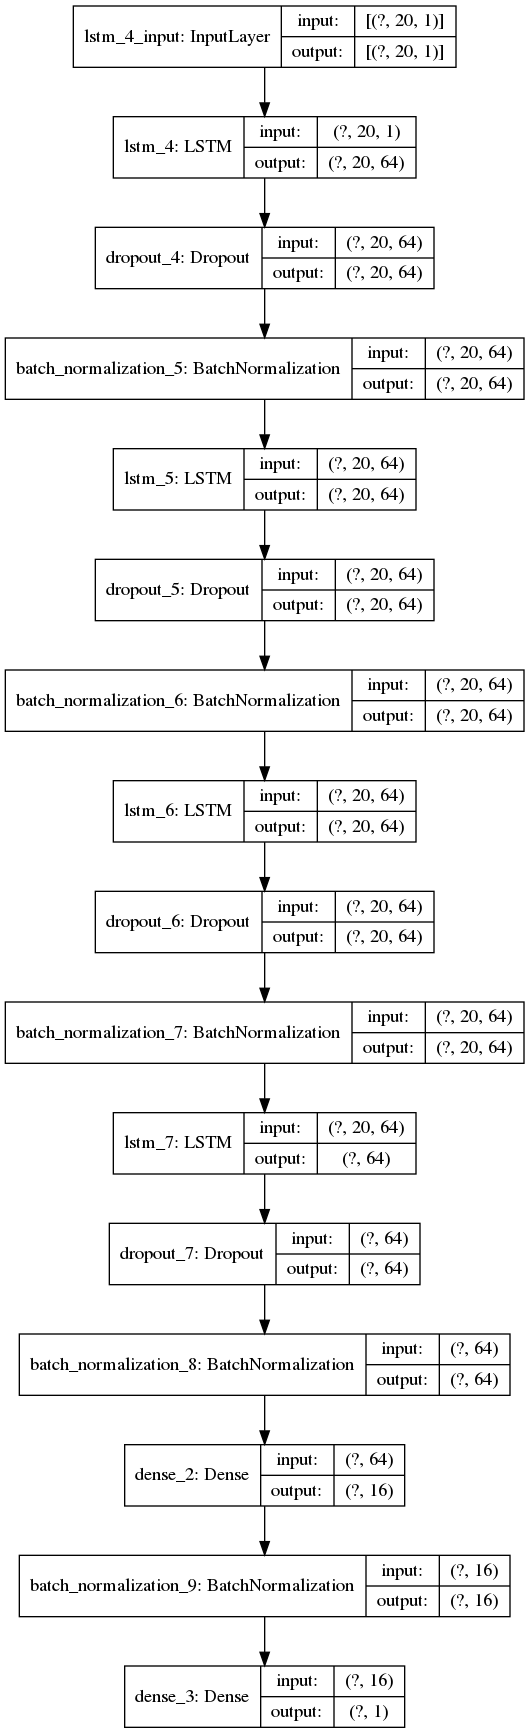

In [22]:
plot_model(RNN_model, to_file='model_plot_tickers.png', show_shapes=True, show_layer_names=True)